In [14]:
import audioread as aud
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
def load(path, dtype=np.float32, n_bytes=2):
    buffer = []
    with aud.audio_open(os.path.realpath(path)) as f:
        samplerate = f.samplerate
        channels = f.channels
        duration = f.duration
        
        for frame in f:
            scale = 1./float(1 << ((8 * n_bytes) - 1))
            fmt = '<i{:d}'.format(n_bytes)
            frame = scale * np.frombuffer(frame, fmt).astype(dtype)
            buffer.append(frame)
    
    if buffer:
        buffer = np.concatenate(buffer)
        
        if channels > 1:
            buffer.reshape((-1, channels)).T
            
    buffer = np.ascontiguousarray(buffer, dtype=dtype)
    return (buffer, samplerate, duration)

In [16]:
x, fs, ds=load('G:/Música/Apocalyptica/(1996) Plays Metallica by Four Cellos/04 - the unforgiven.mp3')


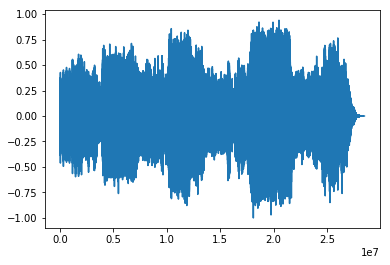

In [17]:
plt.plot(x)
plt.show()

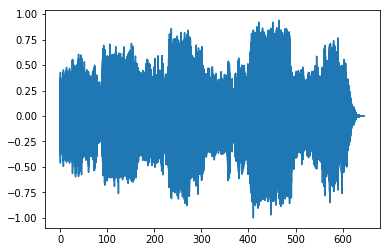

In [19]:
t = np.arange(x.size)/float(fs)
plt.plot(t, x)
plt.show()

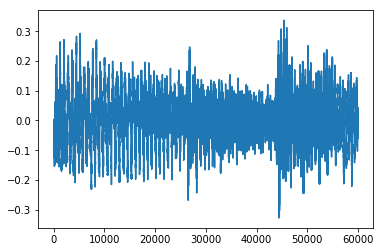

In [21]:
y = x[40000: 100000]
plt.plot(y)
plt.show()

In [22]:
from scipy.io.wavfile import write
write('test.wav', fs, y)

ImportError: cannot import name 'NUMPY_MKL'

## Prueba de audio
<audio controls src="04 - the unforgiven.mp3" type="audio/mpeg">